## Data Check

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
animal_data = pd.read_csv('data_onehot_new.csv')
animal_data = animal_data.drop(['Unnamed: 0'], axis = 1)
animal_data.head()

,weight,hapM,age,neuterN,neuterU,neuterY,dog,cat,kindETC,protect,return,death_E,adopt,death_N,items,bad
0,0.9,7.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4.2,7.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.3,6.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3.0,6.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
animal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132921 entries, 0 to 132920
Data columns (total 16 columns):
weight     132921 non-null float64
hapM       132921 non-null float64
age        132921 non-null float64
neuterN    132921 non-null float64
neuterU    132921 non-null float64
neuterY    132921 non-null float64
dog        132921 non-null float64
cat        132921 non-null float64
kindETC    132921 non-null float64
protect    132921 non-null float64
return     132921 non-null float64
death_E    132921 non-null float64
adopt      132921 non-null float64
death_N    132921 non-null float64
items      132921 non-null float64
bad        132921 non-null float64
dtypes: float64(16)
memory usage: 16.2 MB


In [5]:
animal_data.describe()

,weight,hapM,age,neuterN,neuterU,neuterY,dog,cat,kindETC,protect,return,death_E,adopt,death_N,items,bad
count,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000,132921.000000
mean,5.480041,5.778733,2.782171,0.609934,0.333649,0.056417,0.736550,0.252090,0.011360,0.064286,0.144838,0.193340,0.311087,0.257145,0.150322,0.360161
std,10.257781,3.151417,2.696216,0.487767,0.471518,0.230726,0.440506,0.434214,0.105977,0.245263,0.351939,0.394919,0.462940,0.437062,0.357388,0.480049
min,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,5.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,8.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1935.000000,12.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Split : Train / Test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_all = animal_data.drop(['protect', 'return', 'death_E', 'adopt', 'death_N'], axis = 1)
y_protect = animal_data['protect']
y_return = animal_data['return']
y_death_E = animal_data['death_E']
y_adopt = animal_data['adopt']
y_death_N = animal_data['death_N']
y_all = pd.concat([y_protect, y_return, y_adopt, y_death_E, y_death_N], axis=1, sort=False)

In [8]:
y_all.head()

,protect,return,adopt,death_E,death_N
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [9]:
X_train_A, X_final_test, y_train_A, y_final_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 101)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train_A, y_train_A, test_size = 0.2, random_state = 100)

In [11]:
print(X_train_A.count()[0], ': 전체 트레인 데이터')
print(y_final_test.count()[0], ': 최종 테스트 데이터 정답')
print()
print(X_train.count()[0], ': 부분 트레인 데이터')
print(X_test.count()[0], ': 부분 테스트 데이터')
print(y_train.count()[0], ': 부분 트레인 데이터 정답')
print(y_test.count()[0], ': 부분 테스트 데이터 정답')

106336 : 전체 트레인 데이터
26585 : 최종 테스트 데이터 정답

85068 : 부분 트레인 데이터
21268 : 부분 테스트 데이터
85068 : 부분 트레인 데이터 정답
21268 : 부분 테스트 데이터 정답


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
y_train_protect = y_train['protect']
y_train_return = y_train['return']
y_train_adopt = y_train['adopt']
y_train_death_E = y_train['death_E']
y_train_death_N = y_train['death_N']

In [14]:
y_test_protect = y_test['protect']
y_test_return = y_test['return']
y_test_adopt = y_test['adopt']
y_test_death_E = y_test['death_E']
y_test_death_N = y_test['death_N']

In [15]:
y_train_protect.head()

132050    0.0
9921      0.0
77088     0.0
114133    0.0
19947     0.0
Name: protect, dtype: float64

In [16]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_death_N)
logistic_prediction = logistic_model.predict(X_test)

print(classification_report(y_test_death_N, logistic_prediction))
print(confusion_matrix(y_test_death_N, logistic_prediction))

             precision    recall  f1-score   support

        0.0       0.82      0.91      0.86     15869
        1.0       0.61      0.41      0.49      5399

avg / total       0.77      0.78      0.77     21268

[[14455  1414]
 [ 3164  2235]]


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train_death_N)
knn_prediction = knn_model.predict(X_test)

print(classification_report(y_test_death_N, knn_prediction))
print(confusion_matrix(y_test_death_N, knn_prediction))

             precision    recall  f1-score   support

        0.0       0.81      0.79      0.80     15869
        1.0       0.42      0.44      0.43      5399

avg / total       0.71      0.70      0.71     21268

[[12578  3291]
 [ 3015  2384]]


In [24]:
knn_error_rate = []

for i in range(1, 25):
    knn_upgraded_model = KNeighborsClassifier(n_neighbors=i)
    knn_upgraded_model.fit(X_train, y_train_death_N)
    i_knn_model = knn_upgraded_model.predict(X_test)
    knn_error_rate.append(np.mean(i_knn_model != y_test_death_N))

In [26]:
knn_error_rate2 = []

for i in range(25, 50):
    knn_upgraded_model = KNeighborsClassifier(n_neighbors=i)
    knn_upgraded_model.fit(X_train, y_train_death_N)
    i_knn_model = knn_upgraded_model.predict(X_test)
    knn_error_rate.append(np.mean(i_knn_model != y_test_death_N))

In [29]:
knn_error_merge = knn_error_rate + knn_error_rate2[1:]

Text(0,0.5,'Error Rate')

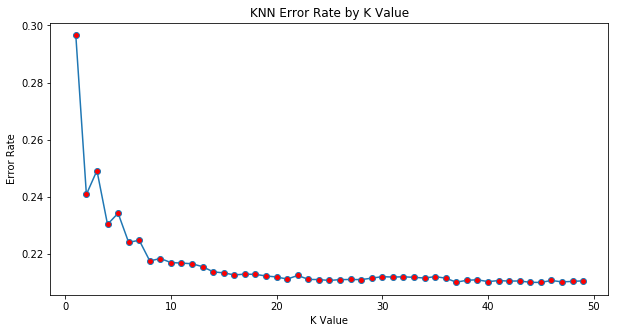

In [30]:
plt.figure(figsize = (10, 5))
plt.plot(range(1, 50), knn_error_merge, marker = 'o', markerfacecolor = 'red')
plt.title('KNN Error Rate by K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [31]:
knn_error_rate.index(min(knn_error_merge)) + 1
# find minimum error rate K Value

45

In [35]:
knn_final_model = KNeighborsClassifier(n_neighbors=45)
knn_final_model.fit(X_train, y_train_death_N)
knn_final_prediction = knn_final_model.predict(X_test)

print('With K Value = 45')
print(classification_report(y_test_death_N, knn_final_prediction))
print(confusion_matrix(y_test_death_N, knn_final_prediction))

With K Value = 45
             precision    recall  f1-score   support

        0.0       0.82      0.92      0.87     15869
        1.0       0.64      0.41      0.49      5399

avg / total       0.77      0.79      0.77     21268

[[14612  1257]
 [ 3211  2188]]
